In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import imageio as imgio
import numpy as np
import pandas as pd
import nrrd
import random

In [5]:
#Create metrics for the first model

predDir1 = '/data2/yeom/ky_aneur/results/dev/resnet50_upernet/resnet50_upernet-resnet50-upernet-ngpus2-batchSize4-imgMaxSize1000-paddingConst32-segmDownsampleRate4-LR_encoder0.02-LR_decoder0.02-epoch20/'

maskPos1 = [] #images with ground truth predictions
predPos1 = [] #images with positive predictions

for f in os.listdir(predDir1):
    img = imgio.imread(predDir1 + f)
    if np.sum(img[:, -1024:-512, :] - 120) != 0:
        maskPos1.append(f)
    
    if np.sum(img[:, -512:, :] - 120) != 0:
        predPos1.append(f)

TruePos1 = list(set(maskPos1) & set(predPos1))
FalsePos1 = list(set(predPos1).difference(set(maskPos1))) #Incorrectly predicted aneurysm present
FalseNeg1 = list(set(maskPos1).difference(set(predPos1))) #Failed to detect aneurysm
TrueNeg1 = list(set(os.listdir(predDir1)).difference(set(maskPos1)).difference(set(predPos1)))

print(len(TruePos1)); print(len(FalsePos1)); print(len(FalseNeg1)); print(len(TrueNeg1))

60
943
0
1897


In [6]:
#Create metrics for the second model, after penalising loss more for false positives

predDir2 = '/data2/yeom/ky_aneur/results/dev/resnet50_upernet_train3/resnet50_upernet_train3-resnet50-upernet-ngpus2-batchSize4-imgMaxSize1000-paddingConst32-segmDownsampleRate4-LR_encoder0.02-LR_decoder0.02-epoch20/'

maskPos2 = [] #images with ground truth predictions
predPos2= [] #images with positive predictions

for f in os.listdir(predDir2):
    img = imgio.imread(predDir2 + f)
    if np.sum(img[:, -1024:-512, :] - 120) != 0:
        maskPos2.append(f)
    
    if np.sum(img[:, -512:, :] - 120) != 0:
        predPos2.append(f)


TruePos2 = list(set(maskPos2) & set(predPos2))
FalsePos2 = list(set(predPos2).difference(set(maskPos2))) #Incorrectly predicted aneurysm present
FalseNeg2 = list(set(maskPos2).difference(set(predPos2))) #Failed to detect aneurysm
TrueNeg2 = list(set(os.listdir(predDir2)).difference(set(maskPos2)).difference(set(predPos2)))

print(len(TruePos2)); print(len(FalsePos2)); print(len(FalseNeg2)); print(len(TrueNeg2))
    

39
23
21
2817


In [7]:
# Create summary tables

recall1 = len(TruePos1)/(len(TruePos1)+len(FalseNeg1))
precision1 = '{0:.2f}'.format(float(len(TruePos1)/(float(len(TruePos1)+float(len(FalsePos1))))))
summary1 = pd.DataFrame([[len(TruePos1),len(FalseNeg1),recall1],[len(FalsePos1),len(TrueNeg1),''],[precision1,'','']],columns=['Predicted','Not Predicted','Recall'],index=['Present','Not Present','Precision'])

recall2 = float(len(TruePos2)/(float(len(TruePos2)+float(len(FalseNeg2)))))
precision2 = '{0:.2f}'.format(float(len(TruePos2)/(float(len(TruePos2)+float(len(FalsePos2))))))
summary2 = pd.DataFrame([[len(TruePos2),len(FalseNeg2),recall2],[len(FalsePos2),len(TrueNeg2),''],[precision2,'','']],columns=['Predicted','Not Predicted','Recall'],index=['Present','Not Present','Precision'])


print(summary1)
print(summary2)

summary = pd.concat([summary1,summary2],axis=1)
print(summary)

summary1.style
summary2.style



            Predicted Not Predicted Recall
Present            60             0      1
Not Present       943          1897       
Precision        0.06                     
            Predicted Not Predicted Recall
Present            39            21   0.65
Not Present        23          2817       
Precision        0.63                     
            Predicted Not Predicted Recall Predicted Not Predicted Recall
Present            60             0      1        39            21   0.65
Not Present       943          1897               23          2817       
Precision        0.06                           0.63                     


,Predicted,Not Predicted,Recall
Present,39,21,0.65
Not Present,23,2817,
Precision,0.63,,


In [8]:
#Each patient with an aneurysm always has some correctly identified slices

print(np.sort(FalseNeg2))
print(np.sort(TruePos2))

['IM-0004-0280.png' 'IM-0004-0287.png' 'IM-0004-0288.png'
 'IM-0020-0389.png' 'IM-0020-0390.png' 'IM-0020-0391.png'
 'IM-0020-0392.png' 'IM-0020-0393.png' 'IM-0020-0394.png'
 'IM-0020-0395.png' 'IM-0020-0397.png' 'IM-0020-0398.png'
 'IM-0048-0073.png' 'IM-0048-0077.png' 'IM-0048-0080.png'
 'IM-0048-0081.png' 'IM-0048-0083.png' 'IM-0048-0085.png'
 'IM-0048-0090.png' 'IM-0048-0091.png' 'IM-0048-0092.png']
['IM-0004-0281.png' 'IM-0004-0282.png' 'IM-0004-0283.png'
 'IM-0004-0284.png' 'IM-0004-0285.png' 'IM-0004-0286.png'
 'IM-0006-0413.png' 'IM-0006-0414.png' 'IM-0006-0415.png'
 'IM-0006-0416.png' 'IM-0006-0417.png' 'IM-0008-0447.png'
 'IM-0008-0448.png' 'IM-0008-0449.png' 'IM-0008-0450.png'
 'IM-0008-0451.png' 'IM-0008-0452.png' 'IM-0008-0453.png'
 'IM-0008-0454.png' 'IM-0008-0455.png' 'IM-0008-0456.png'
 'IM-0020-0396.png' 'IM-0028-0402.png' 'IM-0028-0403.png'
 'IM-0028-0404.png' 'IM-0028-0405.png' 'IM-0028-0406.png'
 'IM-0048-0072.png' 'IM-0048-0074.png' 'IM-0048-0075.png'
 'IM-0048-007

In [9]:
print(np.sort(FalsePos2))
print(np.sort(TruePos2))

['IM-0006-0410.png' 'IM-0006-0411.png' 'IM-0006-0412.png'
 'IM-0006-0418.png' 'IM-0006-0419.png' 'IM-0006-0420.png'
 'IM-0008-0457.png' 'IM-0008-0482.png' 'IM-0008-0483.png'
 'IM-0028-0395.png' 'IM-0028-0400.png' 'IM-0028-0401.png'
 'IM-0028-0436.png' 'IM-0048-0069.png' 'IM-0048-0070.png'
 'IM-0048-0071.png' 'IM-0048-0227.png' 'IM-0048-0228.png'
 'IM-0048-0229.png' 'IM-0048-0230.png' 'IM-0048-0231.png'
 'IM-0048-0232.png' 'IM-0048-0233.png']
['IM-0004-0281.png' 'IM-0004-0282.png' 'IM-0004-0283.png'
 'IM-0004-0284.png' 'IM-0004-0285.png' 'IM-0004-0286.png'
 'IM-0006-0413.png' 'IM-0006-0414.png' 'IM-0006-0415.png'
 'IM-0006-0416.png' 'IM-0006-0417.png' 'IM-0008-0447.png'
 'IM-0008-0448.png' 'IM-0008-0449.png' 'IM-0008-0450.png'
 'IM-0008-0451.png' 'IM-0008-0452.png' 'IM-0008-0453.png'
 'IM-0008-0454.png' 'IM-0008-0455.png' 'IM-0008-0456.png'
 'IM-0020-0396.png' 'IM-0028-0402.png' 'IM-0028-0403.png'
 'IM-0028-0404.png' 'IM-0028-0405.png' 'IM-0028-0406.png'
 'IM-0048-0072.png' 'IM-0048-007

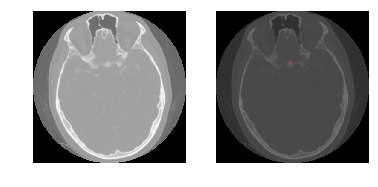

IM-0006-0410.png
0
9060


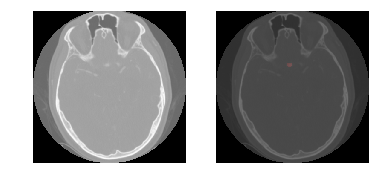

IM-0006-0411.png
0
14640


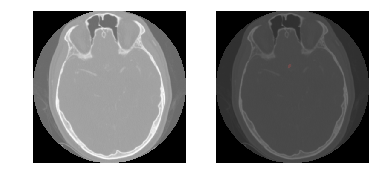

IM-0006-0412.png
0
7500


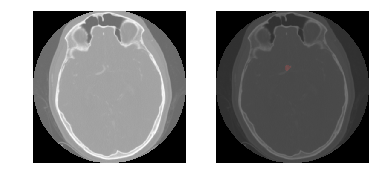

IM-0006-0418.png
0
16140


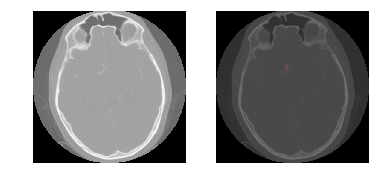

IM-0006-0419.png
0
11220


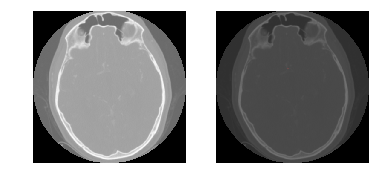

IM-0006-0420.png
0
1140


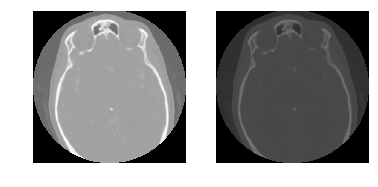

IM-0008-0457.png
0
6120


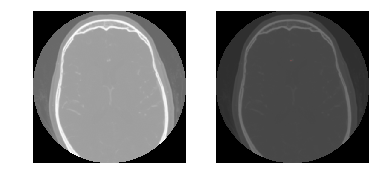

IM-0008-0482.png
0
720


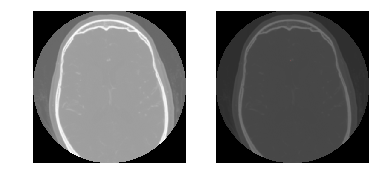

IM-0008-0483.png
0
60


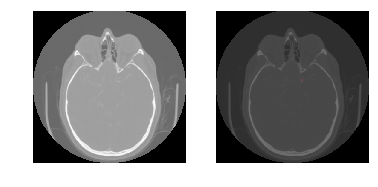

IM-0028-0395.png
0
2340


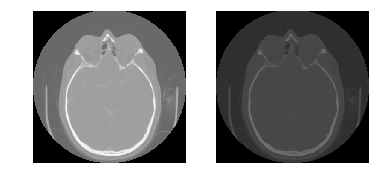

IM-0028-0400.png
0
780


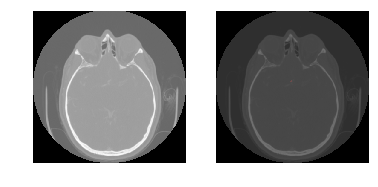

IM-0028-0401.png
0
2520


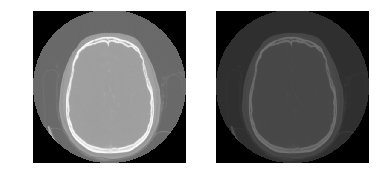

IM-0028-0436.png
0
60


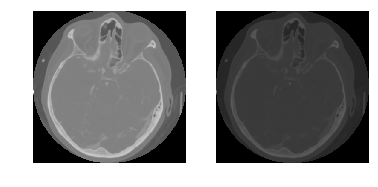

IM-0048-0069.png
0
1620


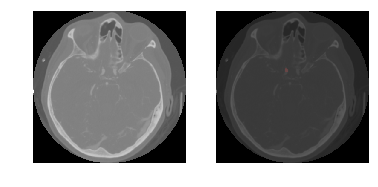

IM-0048-0070.png
0
7380


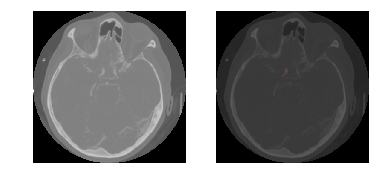

IM-0048-0071.png
0
6720


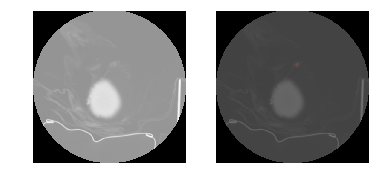

IM-0048-0227.png
0
8880


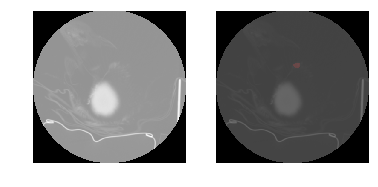

IM-0048-0228.png
0
19440


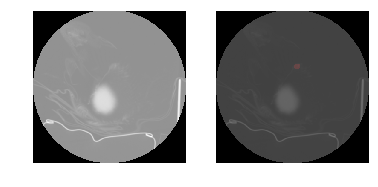

IM-0048-0229.png
0
17460


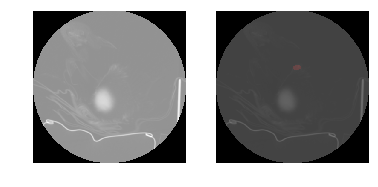

IM-0048-0230.png
0
23340


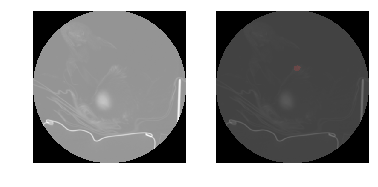

IM-0048-0231.png
0
20640


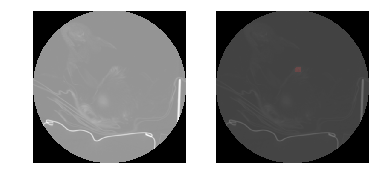

IM-0048-0232.png
0
20460


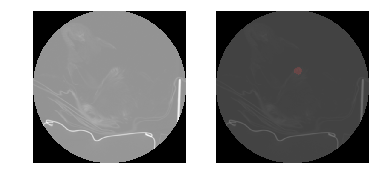

IM-0048-0233.png
0
30240


In [19]:
random.seed(101)

# Look at the False Posive slices
for i in np.sort(FalsePos2):

    img = imgio.imread(predDir2 + i)
    
    plt.subplot(1, 2, 1)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -512:, :] - 120, interpolation='none', alpha=0.55)
    
    plt.axis('off')
    plt.show()

    print(i)
    print(np.sum(img[:, -1024:-512, :] - 120))
    print(np.sum(img[:, -512:, :] - 120))

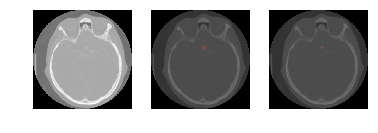

IM-0004-0281.png
31620
7620


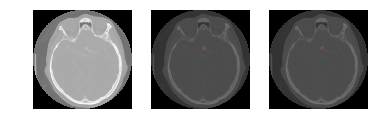

IM-0004-0282.png
23460
18060


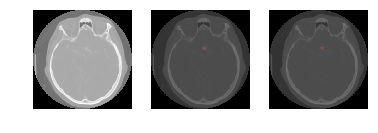

IM-0004-0283.png
24960
17640


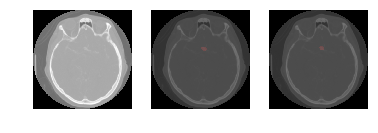

IM-0004-0284.png
28920
21780


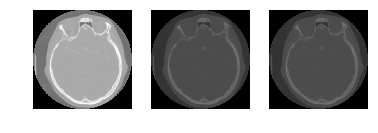

IM-0004-0285.png
17460
20040


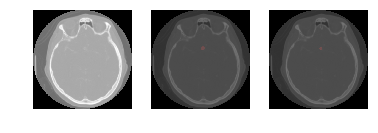

IM-0004-0286.png
20580
11280


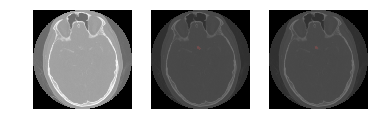

IM-0006-0413.png
17040
13140


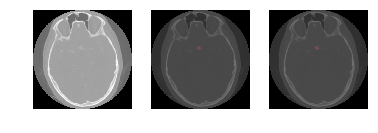

IM-0006-0414.png
20340
22980


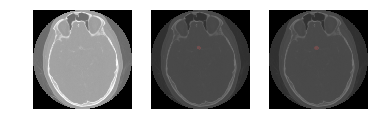

IM-0006-0415.png
21120
26100


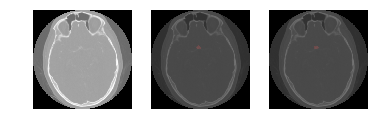

IM-0006-0416.png
21900
23940


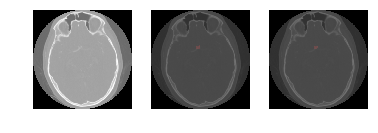

IM-0006-0417.png
25800
17940


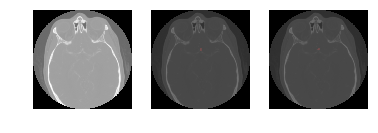

IM-0008-0447.png
7440
7140


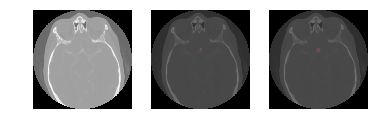

IM-0008-0448.png
8880
22020


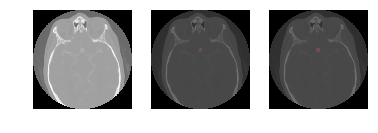

IM-0008-0449.png
12360
25680


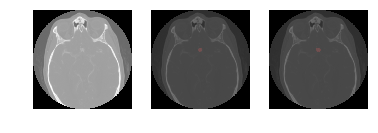

IM-0008-0450.png
19080
29520


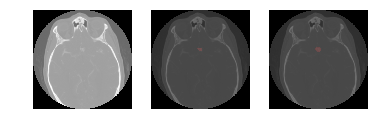

IM-0008-0451.png
19020
36540


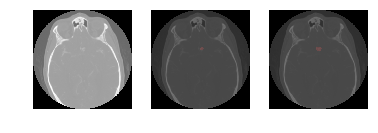

IM-0008-0452.png
15120
33960


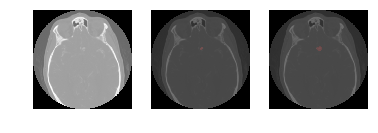

IM-0008-0453.png
13980
33720


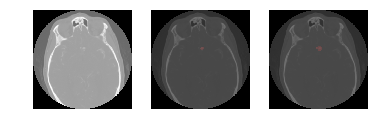

IM-0008-0454.png
13860
32880


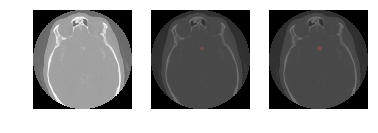

IM-0008-0455.png
12780
31020


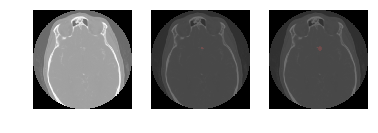

IM-0008-0456.png
8580
26100


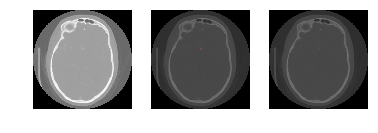

IM-0020-0396.png
4440
240


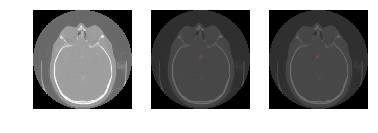

IM-0028-0402.png
22560
12660


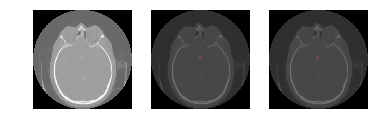

IM-0028-0403.png
21660
19920


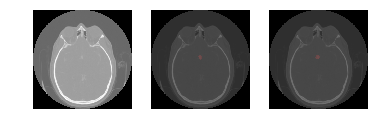

IM-0028-0404.png
21540
24000


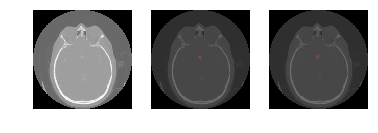

IM-0028-0405.png
18540
19860


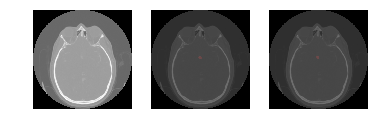

IM-0028-0406.png
14820
13980


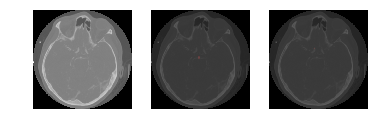

IM-0048-0072.png
10860
480


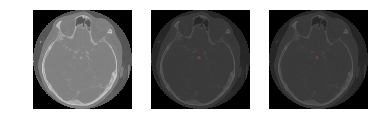

IM-0048-0074.png
14880
7380


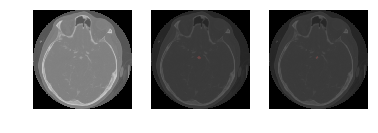

IM-0048-0075.png
17280
5460


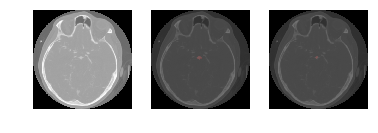

IM-0048-0076.png
20700
8400


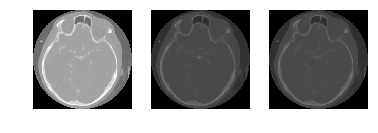

IM-0048-0078.png
19140
2880


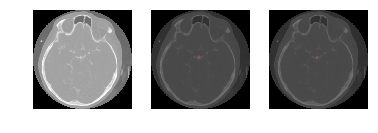

IM-0048-0079.png
21960
11400


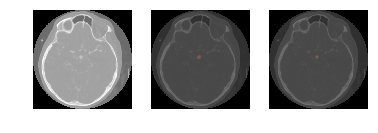

IM-0048-0082.png
25980
14640


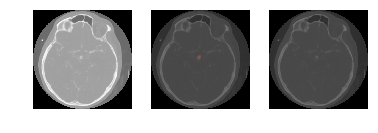

IM-0048-0084.png
24720
840


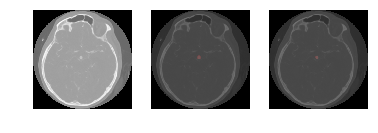

IM-0048-0086.png
24660
12060


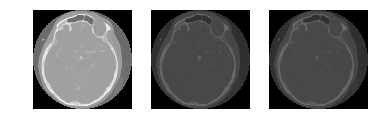

IM-0048-0087.png
26460
14220


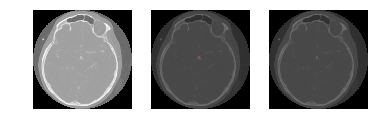

IM-0048-0088.png
23640
10500


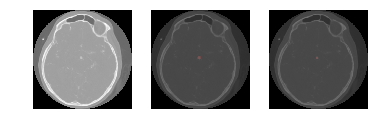

IM-0048-0089.png
20100
5040


In [23]:
random.seed(101)

# Look at True Posive slices
for i in np.sort(TruePos2):
    img = imgio.imread(predDir2 + i)
    
    plt.subplot(1, 3, 1)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -1024:-512, :] - 120, interpolation='none', alpha=0.55)
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -512:, :] - 120, interpolation='none', alpha=0.55)
    plt.axis('off')
    
    plt.show()

    print(i)
    print(np.sum(img[:, -1024:-512, :] - 120))
    print(np.sum(img[:, -512:, :] - 120))

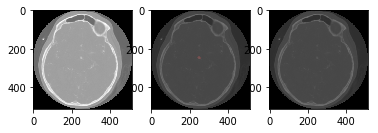

17760
0


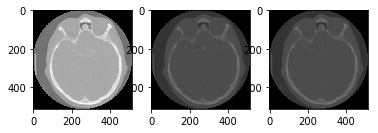

18240
0


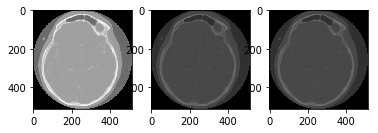

4800
0


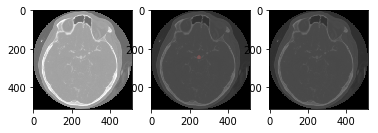

22800
0


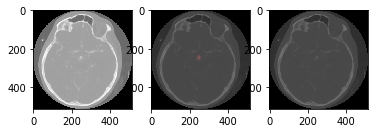

26280
0


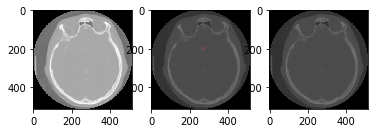

21120
0


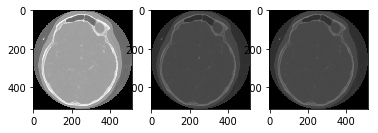

8640
0


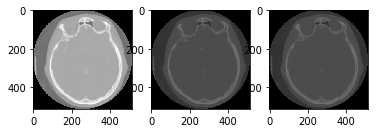

9900
0


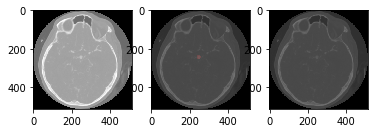

24660
0


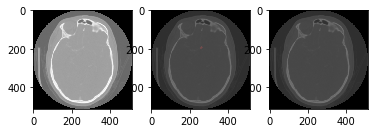

10620
0


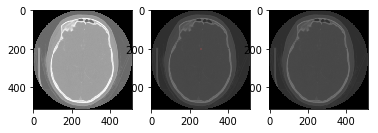

4260
0


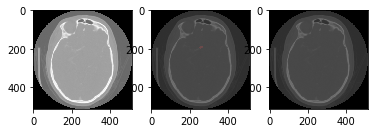

12420
0


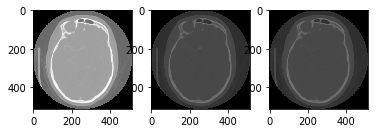

9420
0


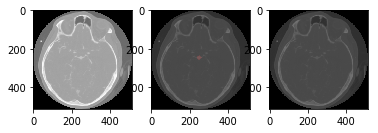

25440
0


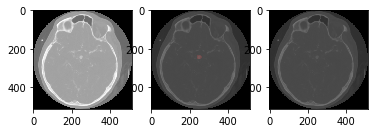

26640
0


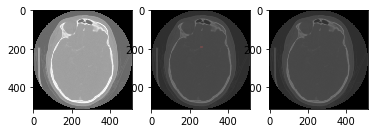

10920
0


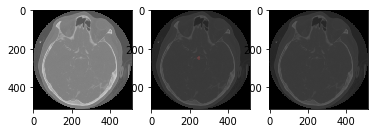

16200
0


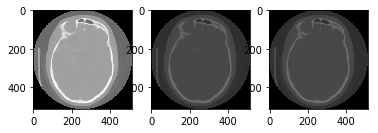

9600
0


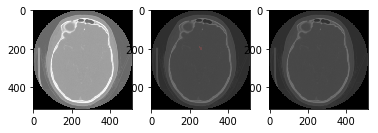

12960
0


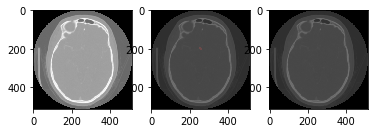

12180
0


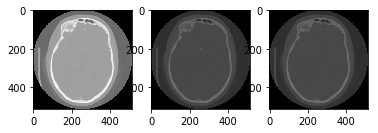

4380
0


In [5]:
random.seed(101)

# Look at random selection of False Negative slices
for i in FalseNeg:
    img = imgio.imread(predDir + i)
    
    plt.subplot(1, 3, 1)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -1024:-512, :] - 120, interpolation='none', alpha=0.55)
    
    plt.subplot(1, 3, 3)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -512:, :] - 120, interpolation='none', alpha=0.55)
    plt.show()


    print(np.sum(img[:, -1024:-512, :] - 120))
    print(np.sum(img[:, -512:, :] - 120))

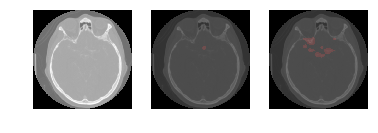

IM-0004-0280.png
18240
297360


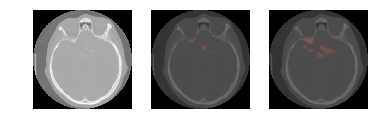

IM-0004-0281.png
31620
327300


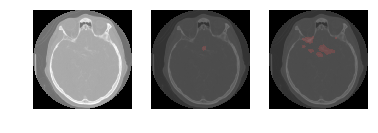

IM-0004-0282.png
23460
346620


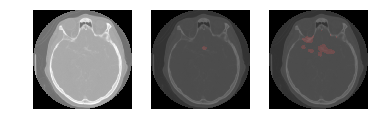

IM-0004-0283.png
24960
351300


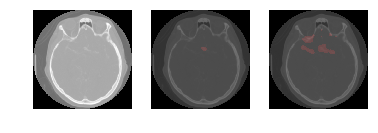

IM-0004-0284.png
28920
370260


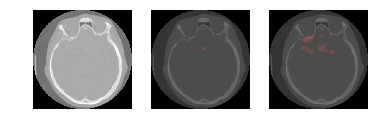

IM-0004-0285.png
17460
352620


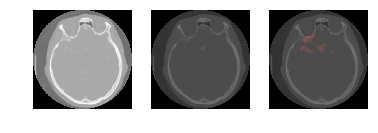

IM-0004-0286.png
20580
288660


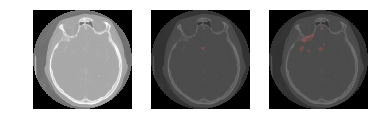

IM-0004-0287.png
21120
198360


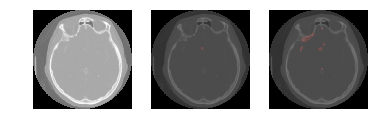

IM-0004-0288.png
9900
167340


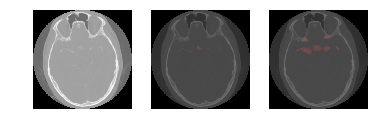

IM-0006-0413.png
17040
298020


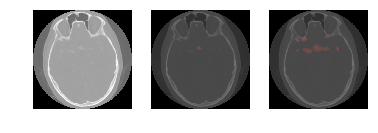

IM-0006-0414.png
20340
270480


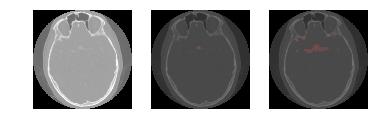

IM-0006-0415.png
21120
226260


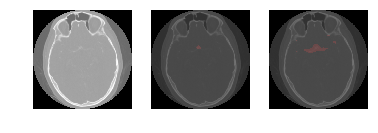

IM-0006-0416.png
21900
189420


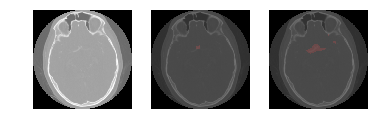

IM-0006-0417.png
25800
159660


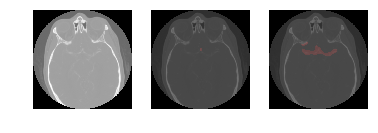

IM-0008-0447.png
7440
279000


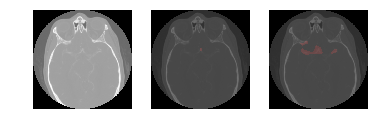

IM-0008-0448.png
8880
235260


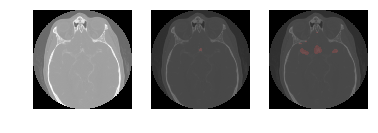

IM-0008-0449.png
12360
182520


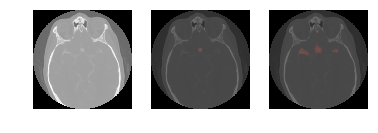

IM-0008-0450.png
19080
188280


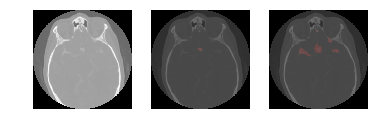

IM-0008-0451.png
19020
217140


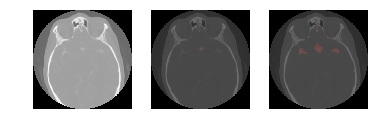

IM-0008-0452.png
15120
196020


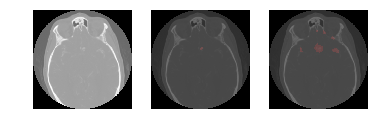

IM-0008-0453.png
13980
179940


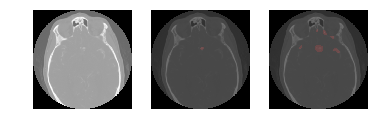

IM-0008-0454.png
13860
175020


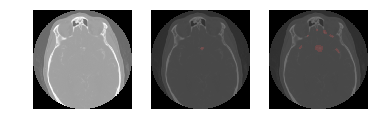

IM-0008-0455.png
12780
157680


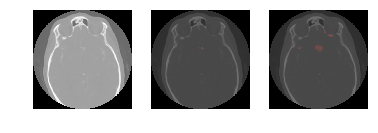

IM-0008-0456.png
8580
115860


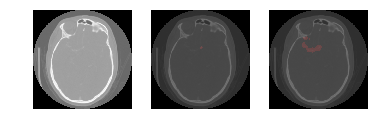

IM-0020-0389.png
10620
171600


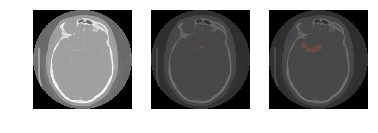

IM-0020-0390.png
10920
179940


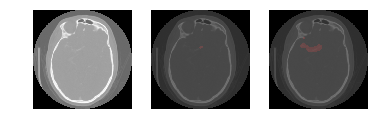

IM-0020-0391.png
12420
188100


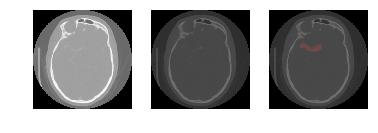

IM-0020-0392.png
9600
198840


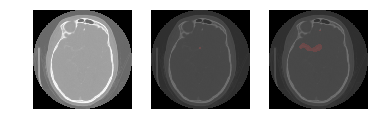

IM-0020-0393.png
9420
195240


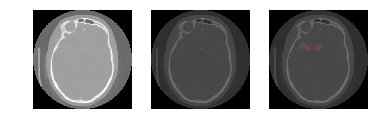

IM-0020-0394.png
12180
176580


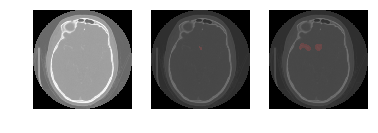

IM-0020-0395.png
12960
166920


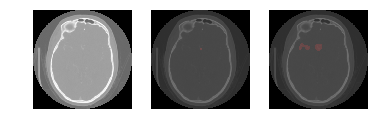

IM-0020-0396.png
4440
140760


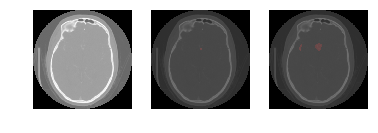

IM-0020-0397.png
4380
87840


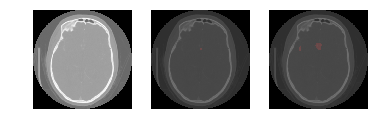

IM-0020-0398.png
4260
71520


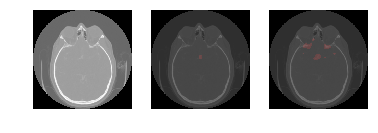

IM-0028-0402.png
22560
191880


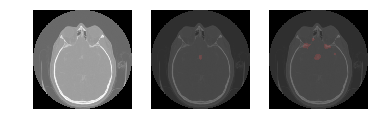

IM-0028-0403.png
21660
160500


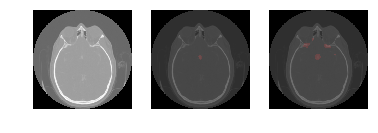

IM-0028-0404.png
21540
137700


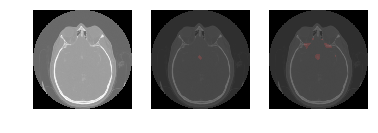

IM-0028-0405.png
18540
133560


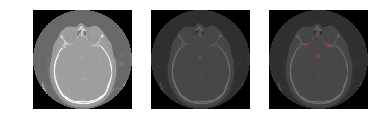

IM-0028-0406.png
14820
119640


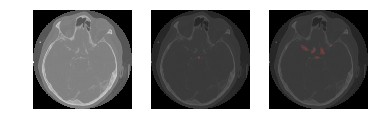

IM-0048-0072.png
10860
148620


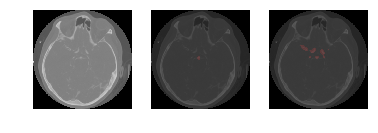

IM-0048-0073.png
16200
134880


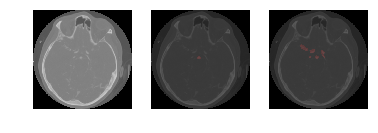

IM-0048-0074.png
14880
130800


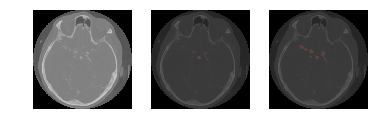

IM-0048-0075.png
17280
115860


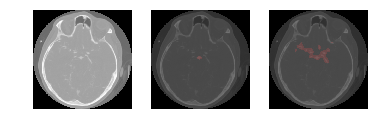

IM-0048-0076.png
20700
363780


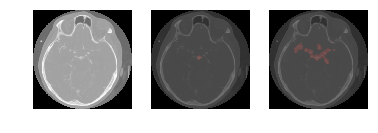

IM-0048-0077.png
25440
394500


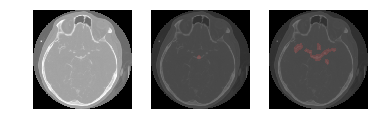

IM-0048-0078.png
19140
403980


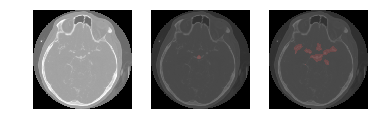

IM-0048-0079.png
21960
414900


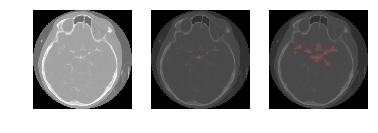

IM-0048-0080.png
22800
433800


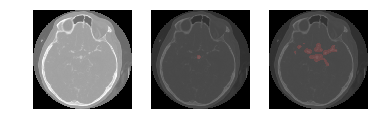

IM-0048-0081.png
24660
449880


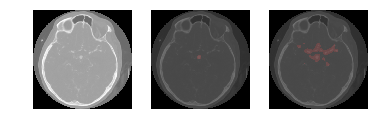

IM-0048-0082.png
25980
422160


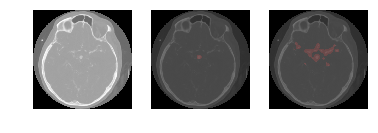

IM-0048-0083.png
26640
433740


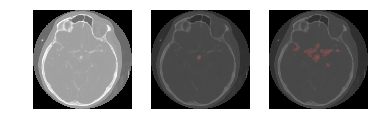

IM-0048-0084.png
24720
407880


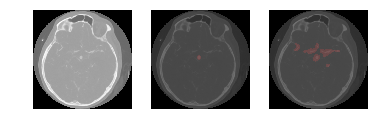

IM-0048-0085.png
26280
385740


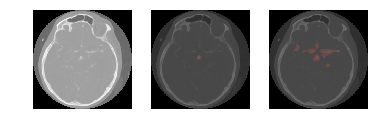

IM-0048-0086.png
24660
364620


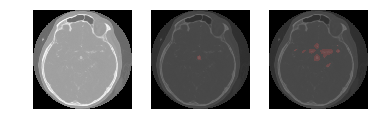

IM-0048-0087.png
26460
318060


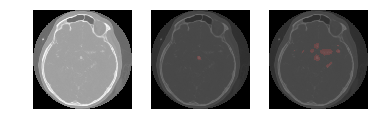

IM-0048-0088.png
23640
268140


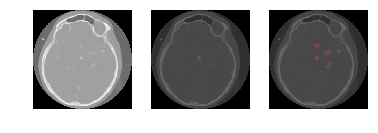

IM-0048-0089.png
20100
192120


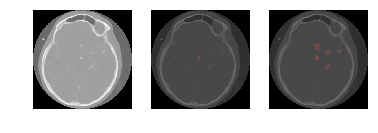

IM-0048-0090.png
17760
171180


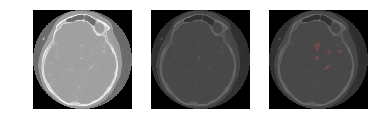

IM-0048-0091.png
8640
152220


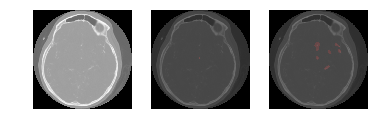

IM-0048-0092.png
4800
138060


In [24]:
random.seed(101)

# Look at True Posive slices from model 1
for i in np.sort(TruePos1):
    img = imgio.imread(predDir1 + i)
    
    plt.subplot(1, 3, 1)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -1024:-512, :] - 120, interpolation='none', alpha=0.55)
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(img[:, :512, :], 'gray', interpolation='none')
    plt.imshow(img[:, -512:, :] - 120, interpolation='none', alpha=0.55)
    plt.axis('off')
    
    plt.show()

    print(i)
    print(np.sum(img[:, -1024:-512, :] - 120))
    print(np.sum(img[:, -512:, :] - 120))

    